# Predicting Default of Credit Card Clients

## Coded by Sharon Marfatia

**Data source: https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset**

In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data.

## Imports

In [ ]:
import os

%matplotlib inline
import string
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os
import re
import sys
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, f_classif

<br><br>

## 1. Picking the problem and explain the prediction problem

1. This dataset is based on credit card clients from Taiwan from April 2005 to September 2005. It has information on the ID, limit balance sex, education, marriage, age, payment status from April to September (Pay_#), Bill Amount (BILL_ATM#), previous payment history (PAY_ATM#) and the default payment where 1 = yes, and 0 = no. We can use some of these features to predict whether the client will default or not.

In [ ]:
credits_df = pd.read_csv("data/UCI_Credit_Card.csv")
credits_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


<!-- END QUESTION -->

<br><br>

## 2. Data splitting

In [ ]:
train_df, test_df = train_test_split(credits_df, test_size = 0.3, random_state = 123)

<!-- END QUESTION -->

<br><br>

In [ ]:
train_df['EDUCATION'].value_counts()

2    9815
1    7433
3    3416
5     210
4      81
6      35
0      10
Name: EDUCATION, dtype: int64

## 3. EDA

In [ ]:
train_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
16395,16396,320000.0,2,1,2,36,0,0,0,0,...,19370.0,10155.0,3788.0,5000.0,5018.0,1000.0,3000.0,0.0,7013.0,0
21448,21449,440000.0,2,1,2,30,-1,-1,-1,0,...,171244.0,150897.0,117870.0,612.0,87426.0,130007.0,3018.0,15000.0,51663.0,0
20034,20035,160000.0,2,3,1,44,-2,-2,-2,-2,...,-18.0,-18.0,-18.0,0.0,0.0,0.0,0.0,0.0,0.0,0
25755,25756,120000.0,2,2,1,30,0,0,0,0,...,103058.0,71095.0,47379.0,3706.0,5502.0,4204.0,3017.0,2005.0,1702.0,0
1438,1439,50000.0,1,2,2,54,1,2,0,0,...,27585.0,27910.0,27380.0,0.0,1400.0,1200.0,1500.0,1000.0,1500.0,0


In [ ]:
# Part 1:
train_df.sort_index()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [ ]:
train_df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [ ]:
train_df["PAY_0"].unique()

array([ 0, -1, -2,  1,  2,  3,  5,  8,  7,  4,  6], dtype=int64)

In [ ]:
# We dont know what the column values 0, -2 represent for Pay columns based on the description of the dataset on Kaggle
# so we are replacing them with 0 for now. We will replace these values with the most frequent value in the column during the
# imputation step. We have also replaced 5 and 6 with 0 in the Education column for the same reason.
# As per the dataset description on Kaggle (https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset)there
# is no information for these missing values so we have to use our best judgement to find a solution for these missing values.

columns_to_replace = ['EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

train_df['EDUCATION'] = train_df['EDUCATION'].replace(5, 0)
test_df['EDUCATION'] = test_df['EDUCATION'].replace(5, 0)

train_df['EDUCATION'] = train_df['EDUCATION'].replace(6, 0)
test_df['EDUCATION'] = test_df['EDUCATION'].replace(6, 0)

train_df[columns_to_replace] = train_df[columns_to_replace].replace(-2, 0)
test_df[columns_to_replace] = test_df[columns_to_replace].replace(-2, 0)


In [ ]:
credits_summary = train_df.describe(include="all")
credits_summary

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,...,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,14962.348238,167880.651429,1.600762,1.792143,1.554000,35.500810,0.163524,0.113095,0.102952,0.066000,...,43486.610905,40428.518333,38767.202667,5673.585143,5.895027e+03,5311.432286,4774.021381,4751.850095,5237.762190,0.223238
std,8650.734050,130202.682167,0.489753,0.733103,0.521675,9.212644,0.933282,0.965632,0.948892,0.910713,...,64843.303993,61187.200817,59587.689549,17033.241454,2.180143e+04,18377.997079,15434.136142,15228.193125,18116.846563,0.416427
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-50616.000000,-61372.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7498.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,...,2293.750000,1739.500000,1215.750000,1000.000000,8.200000e+02,390.000000,266.000000,234.000000,110.750000,0.000000
50%,14960.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19102.500000,18083.000000,16854.500000,2100.000000,2.007000e+03,1809.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,22458.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54763.250000,50491.000000,49253.750000,5007.250000,5.000000e+03,4628.500000,4021.250000,4016.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.227082e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
# 1st summary statistic
print("Maximum payment delay in months for September is", credits_summary.loc['max']['PAY_0'])
months = {2: "August", 3: "July", 4: "June", 5: "May", 6: "April"}
for i in range(2, 7):
    x = credits_summary.loc['max']['PAY_' + str(i)]
    print("Maximum payment delay in months for", months[i], "is", x)

Maximum payment delay in months for September is 8.0
Maximum payment delay in months for August is 8.0
Maximum payment delay in months for July is 8.0
Maximum payment delay in months for June is 8.0
Maximum payment delay in months for May is 8.0
Maximum payment delay in months for April is 8.0


In [ ]:
# 2nd summary statistic
months = {1: "September", 2: "August", 3: "July", 4: "June", 5: "May", 6: "April"}
for i in range(1, 7):
    x = credits_summary.loc['mean']['PAY_AMT' + str(i)]
    print("Mean amount of bill statement in", months[i], "is", x, "(NT dollar)")


Mean amount of bill statement in September is 5673.585142857143 (NT dollar)
Mean amount of bill statement in August is 5895.026904761905 (NT dollar)
Mean amount of bill statement in July is 5311.432285714286 (NT dollar)
Mean amount of bill statement in June is 4774.021380952381 (NT dollar)
Mean amount of bill statement in May is 4751.8500952380955 (NT dollar)
Mean amount of bill statement in April is 5237.762190476191 (NT dollar)


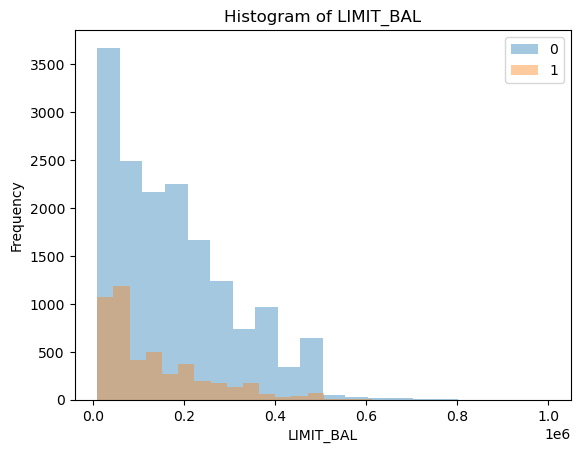

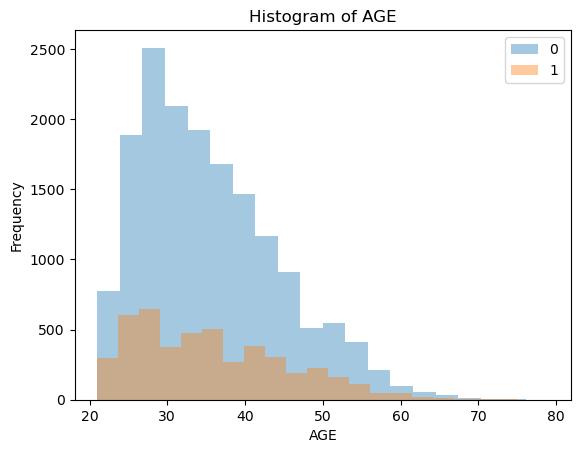

In [ ]:
# 2 Visualizations, adapted from hw3

numeric_cols = ["LIMIT_BAL", "AGE"]
for feat in numeric_cols:
    ax = train_df.groupby("default.payment.next.month")[feat].plot.hist(bins=20, alpha=0.4, legend=True)
    plt.xlabel(feat)
    plt.title("Histogram of " + feat)
    plt.show()

The first histogram for Limit Balance (cap on the total credit card debt that can be incurred by the cardholder) shows that the frequency of default decreases significantly as the limit balance increases. The occurrence of defaulting visibly stopped for a limit balance greater than 0.6. The second histogram for Age tells us that the age where people did not default peaked at around age 29. This may be because people at that age are trying to build their credit history. We see the frequency of default stopped at around the age of 70 and the frequency of default decreases with age overall.

Summarize your initial observations about the data:

There is large class imbalance between individuals who default and those who paid. The frequency of people who paid (16312) is significantly higher than those who did not pay (4688), around 3.5 times more.

In [ ]:
train_df["default.payment.next.month"].value_counts()

0    16312
1     4688
Name: default.payment.next.month, dtype: int64

Pick appropriate metric/metrics for assessment:

An appropriate metric that we will use for cross-validation and assessment is accuracy. We will also calculate the final precision, recall, and F1 score after predicting on unseen data using our model. We will use accuracy because it calculates the ratio of correctly classified examples to the total number of examples in the dataset. We will use precision because it calculates the ratio of true positive predictions to the total number of positive predictions and therefore it measures the model's ability to correctly identify positive instances. We will use recall because it calculates the ratio of true positive predictions to the total number of actual positive examples and therefore, it measures the model's ability to find all positive instances. We will also find the F1 score, the harmonic mean of precision and recall because it provides a balanced measure of the model's performance, taking into account both precision and recall.

<!-- END QUESTION -->

<br><br>

## 4. Feature engineering

In [ ]:
# Added 2 new columns that have the mean bill amount and mean payment amount for 6 months. This may help with making predictions
# using these features for an overall view of bill amound and payment amount over the 6 months.

train_df['AVG_BILL_AMT'] = train_df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)
train_df['AVG_PAY_AMT'] = train_df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].mean(axis=1)

test_df['AVG_BILL_AMT'] = test_df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)
test_df['AVG_PAY_AMT'] = test_df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].mean(axis=1)


In [ ]:
train_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month', 'AVG_BILL_AMT', 'AVG_PAY_AMT'],
      dtype='object')

In [ ]:
train_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,AVG_BILL_AMT,AVG_PAY_AMT
16395,16396,320000.0,2,1,2,36,0,0,0,0,...,3788.0,5000.0,5018.0,1000.0,3000.0,0.0,7013.0,0,19868.833333,3505.166667
21448,21449,440000.0,2,1,2,30,-1,-1,-1,0,...,117870.0,612.0,87426.0,130007.0,3018.0,15000.0,51663.0,0,88137.666667,47954.333333
20034,20035,160000.0,2,3,1,44,0,0,0,0,...,-18.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-18.000000,0.000000
25755,25756,120000.0,2,2,1,30,0,0,0,0,...,47379.0,3706.0,5502.0,4204.0,3017.0,2005.0,1702.0,0,88447.000000,3356.000000
1438,1439,50000.0,1,2,2,54,1,2,0,0,...,27380.0,0.0,1400.0,1200.0,1500.0,1000.0,1500.0,0,34180.166667,1100.000000


<!-- END QUESTION -->

<br><br>

## 5. Preprocessing and transformations

In [ ]:
# creating list of features
numeric_features = ["LIMIT_BAL", "AGE", "AVG_BILL_AMT", "AVG_PAY_AMT", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4",
                    "BILL_AMT5", "BILL_AMT6", "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4",
                    "PAY_AMT5", "PAY_AMT6"]
train_df["SEX"] = train_df["SEX"].map({1: "male", 2: "female"})

test_df["SEX"] = test_df["SEX"].map({1: "male", 2: "female"})

binary_features = ["SEX"]

ordinal_feature_ed = ["EDUCATION"]

ordinal_features_pay0 = ["PAY_0"]
ordinal_features_pay2 = ["PAY_2"]
ordinal_features_pay3 = ["PAY_3"]
ordinal_features_pay4 = ["PAY_4"]
ordinal_features_pay5= ["PAY_5"]
ordinal_features_pay6= ["PAY_6"]


train_df["MARRIAGE"] = train_df["MARRIAGE"].map({1: "married", 2: "single", 3: "others"})

test_df["MARRIAGE"] = test_df["MARRIAGE"].map({1: "married", 2: "single", 3: "others"})

categorical_features = ["MARRIAGE"]

# We can drop ID becuase that is not helpful for making predictions on unseen, new data
drop_features = ["ID"]
train_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month', 'AVG_BILL_AMT', 'AVG_PAY_AMT'],
      dtype='object')

In [ ]:
# Splitting data into X_train, y_train, X_test, and y_test
X_train = train_df.drop(columns=["default.payment.next.month"])
y_train = train_df["default.payment.next.month"]
X_test = test_df.drop(columns = ["default.payment.next.month"])
y_test = test_df["default.payment.next.month"]

print(X_test.shape)

(9000, 26)


In [ ]:
# Defining transformers
# Numeric transformer:
numeric_transformer = StandardScaler()

In [ ]:
# Ordinal transformers:
education_levels = [
    1,
    2,
    3,
    4,
    5,
    6,
]

payment_levels = [
    -1,
    1,
    2,
    3,
    4,
    5,
    6,
    7,
    8,
    9,
]


ordinal_transformer_ed = make_pipeline(SimpleImputer(strategy="most_frequent", missing_values=0),
                                       OrdinalEncoder(categories=[education_levels])
)

ordinal_transformer_pay = make_pipeline(SimpleImputer(strategy="most_frequent", missing_values=0),
                                        OrdinalEncoder(categories=[payment_levels]),
)

In [ ]:
# One-Hot Encoder for binary feature
binary_transformer = OneHotEncoder(drop="if_binary", dtype=int)

In [ ]:
# One-Hot Encoder for categorical feature

categorical_transformer = make_pipeline(SimpleImputer(strategy="constant", fill_value="missing"),
                                        OneHotEncoder(handle_unknown="ignore", sparse=False),
)

In [ ]:
# Part 2: Column Transformer
preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    (ordinal_transformer_ed, ordinal_feature_ed),
    (binary_transformer, binary_features),
    (categorical_transformer, categorical_features),
    (ordinal_transformer_pay, ordinal_features_pay0),
    (ordinal_transformer_pay, ordinal_features_pay2),
    (ordinal_transformer_pay, ordinal_features_pay3),
    (ordinal_transformer_pay, ordinal_features_pay4),
    (ordinal_transformer_pay, ordinal_features_pay5),
    (ordinal_transformer_pay, ordinal_features_pay6),
    ("drop", drop_features),
)


# Created transformed dataframe after Baseline model

<!-- END QUESTION -->

<br><br>

## 6. Baseline model
1. I have tried `scikit-learn`'s baseline model and reported the results.

In [ ]:
dummy = DummyClassifier(strategy="most_frequent")
scores = cross_validate(dummy, X_train, y_train, return_train_score=True)
dummy_df = pd.DataFrame(scores)

In [ ]:
dummy_df

,fit_time,score_time,test_score,train_score
0,0.007001,0.001000,0.776905,0.776726
1,0.003998,0.000000,0.776905,0.776726
2,0.003013,0.001002,0.776667,0.776786
3,0.003989,0.000000,0.776667,0.776786
4,0.004318,0.000000,0.776667,0.776786


<!-- END QUESTION -->



In [ ]:
cross_val_score(dummy, X_train, y_train)

array([0.77690476, 0.77690476, 0.77666667, 0.77666667, 0.77666667])

<br><br>

## 7. Linear models & Hyperparameter Optimization

In [ ]:
all_columns = X_train.columns
all_columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'AVG_BILL_AMT', 'AVG_PAY_AMT'],
      dtype='object')

In [ ]:
transformed_df = pd.DataFrame(preprocessor.fit_transform(X_train))
n_new_cols = transformed_df.shape[1] - X_train.shape[1]
transformed_df
#X_train

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1.168355,0.054187,-0.395799,-0.173458,-0.300665,-0.293394,-0.265310,-0.371930,-0.494781,-0.587035,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.090017,-0.597108,0.679910,4.185515,-0.685307,-0.679495,0.585444,1.970295,1.805461,1.327534,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.060527,0.922579,-0.709155,-0.517197,-0.696132,-0.688319,-0.681234,-0.670935,-0.661045,-0.650908,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.367748,-0.597108,0.684784,-0.188086,0.687456,0.752583,0.835581,0.918719,0.501203,0.144527,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.905384,2.008070,-0.170296,-0.409324,-0.040230,-0.031399,-0.287429,-0.245237,-0.204599,-0.191104,...,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,1.629186,0.162736,-0.480740,-0.375884,-0.513226,-0.486648,-0.488648,-0.450259,-0.400085,-0.389539,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
20996,1.475576,2.008070,-0.677093,-0.361582,-0.695886,-0.688067,-0.680974,-0.630868,-0.618584,-0.534120,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
20997,-0.905384,-0.705657,-0.184677,-0.399714,-0.053288,-0.010446,-0.003381,-0.062716,-0.516534,-0.499414,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20998,-1.058995,-1.574049,-0.280246,-0.384873,-0.309066,-0.288478,-0.254590,-0.195023,-0.179691,-0.372606,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
results_dict = {}

In [ ]:
# Learned this function from CPSC 330
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [ ]:
scoring_metric = "accuracy"
param_grid = {"C": np.logspace(-5, 5, 11)}
for param in param_grid["C"]:
    model_name = "Logistic Regression"
    pipe = make_pipeline(preprocessor, LogisticRegression(C=param, max_iter=1000))

    key = model_name + "(C= " + str(param) + ")"
    results_dict[key] = mean_std_cross_val_scores(
        pipe, X_train, y_train, cv=5, return_train_score=True, scoring = scoring_metric
    )

In [ ]:
results_df = pd.DataFrame(results_dict).T
results_df

,fit_time,score_time,test_score,train_score
Logistic Regression(C= 1e-05),0.063 (+/- 0.011),0.016 (+/- 0.006),0.777 (+/- 0.000),0.777 (+/- 0.000)
Logistic Regression(C= 0.0001),0.045 (+/- 0.006),0.019 (+/- 0.007),0.781 (+/- 0.001),0.781 (+/- 0.000)
Logistic Regression(C= 0.001),0.062 (+/- 0.010),0.015 (+/- 0.004),0.807 (+/- 0.003),0.807 (+/- 0.001)
Logistic Regression(C= 0.01),0.070 (+/- 0.009),0.017 (+/- 0.002),0.815 (+/- 0.003),0.815 (+/- 0.001)
Logistic Regression(C= 0.1),0.099 (+/- 0.007),0.018 (+/- 0.004),0.816 (+/- 0.003),0.818 (+/- 0.001)
Logistic Regression(C= 1.0),0.168 (+/- 0.022),0.021 (+/- 0.007),0.817 (+/- 0.003),0.818 (+/- 0.002)
Logistic Regression(C= 10.0),0.134 (+/- 0.016),0.029 (+/- 0.013),0.817 (+/- 0.003),0.818 (+/- 0.002)
Logistic Regression(C= 100.0),0.125 (+/- 0.017),0.024 (+/- 0.001),0.817 (+/- 0.003),0.818 (+/- 0.002)
Logistic Regression(C= 1000.0),0.125 (+/- 0.010),0.024 (+/- 0.003),0.817 (+/- 0.003),0.818 (+/- 0.002)
Logistic Regression(C= 10000.0),0.132 (+/- 0.011),0.026 (+/- 0.004),0.817 (+/- 0.003),0.818 (+/- 0.002)


Part 4: Summarize your results

From the cross-validation scores along with standard deviation we can see that the best C value would be C = 1.0 since that is where the test score is highest while among all other C values and where the complexity of the model has not compromised efficiency. We can also notice that our test_score (cv_score) is relatively close to our train score indicating less chances of overfitting. The test_score from Logistic Regression is also higher than our baseline model, DummyClassifier.


<!-- END QUESTION -->

<br><br>

## 8. Different models

In [ ]:
scoring_metric = "accuracy"

pipe_dt = make_pipeline(preprocessor, DecisionTreeClassifier(random_state=123))
pipe_rf = make_pipeline(preprocessor, RandomForestClassifier(random_state=123))

pipe_svm = make_pipeline(preprocessor, SVC(kernel='rbf', random_state=123))
pipe_lr = make_pipeline(preprocessor, LogisticRegression(C=1.0, random_state = 123, max_iter=1000)) # included the C value
                                                                                        # from hyperparameter optimization

classifiers = {
    "Decision Tree Classifier": pipe_dt,
    "Random Forest Classifier": pipe_rf,
    "SVM RBF": pipe_svm,
    "Logistic Regression": pipe_lr,
}

results = {}

for (name, model) in classifiers.items():
    results[name] = mean_std_cross_val_scores(
        model, X_train, y_train, return_train_score=True, scoring=scoring_metric
    )

results_4_models = pd.DataFrame(results).T
results_4_models



,fit_time,score_time,test_score,train_score
Decision Tree Classifier,0.550 (+/- 0.046),0.035 (+/- 0.014),0.725 (+/- 0.009),0.999 (+/- 0.000)
Random Forest Classifier,5.190 (+/- 0.692),0.148 (+/- 0.042),0.814 (+/- 0.005),0.999 (+/- 0.000)
SVM RBF,13.447 (+/- 0.297),4.049 (+/- 0.106),0.818 (+/- 0.005),0.825 (+/- 0.001)
Logistic Regression,0.167 (+/- 0.026),0.029 (+/- 0.013),0.817 (+/- 0.003),0.818 (+/- 0.002)


Part 2:

There is overfitting in the Decision Tree Classifier and the Random Forest Classifier. We can see this in the large gap between the train_score and the test_score. The SVM RBF is a better model where the test score is better than the dummy classifier and the gap between the test_score and the train score is small. The fit time and score time of the Decision Tree Classifier is the smallest, the second smallest is the Random Forest Classifier and the model with the highest fit time and score time is SVM RBF. The SVM RBF test score is similar to the Logistic Regression test scores. With hyperparameter optimization on these non-linear models we may be able to beat the linear model.

<!-- END QUESTION -->

<br><br>

## 9. Feature selection

In [ ]:
# Completed the code but the runtime was too long so we have commented this code.

# scoring_metric = "accuracy"

# from sklearn.feature_selection import RFECV
# from sklearn.feature_selection import SelectKBest, f_classif


# pipe_dt = make_pipeline(preprocessor, RFECV(DecisionTreeClassifier(random_state=123)), DecisionTreeClassifier(random_state=123))
# pipe_rf = make_pipeline(preprocessor, RFECV(RandomForestClassifier(random_state=123)), RandomForestClassifier(random_state=123))
# pipe_svm = make_pipeline(preprocessor, SelectKBest(f_classif), SVC(kernel='rbf', random_state=123))
# pipe_lr = make_pipeline(preprocessor, SelectKBest(f_classif), LogisticRegression(C=1.0, random_state=123))

# classifiers = {
#     "Decision Tree Classifier": pipe_dt,
#     "Random Forest Classifier": pipe_rf,
#     "SVM RBF": pipe_svm,
#     "Logistic Regression": pipe_lr,
# }

# results = {}

# for (name, model) in classifiers.items():
#     results[name] = mean_std_cross_val_scores(
#         model, X_train, y_train, return_train_score=True, scoring=scoring_metric
#     )

# results_4_models = pd.DataFrame(results).T
# results_4_models


<!-- END QUESTION -->

<br><br>

## 10. Hyperparameter optimization using RandomizedSearchCV

In [ ]:
# For SVM with RBF kernel: optimizing multiple hyperparameters for a single model

from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from scipy.stats import uniform, loguniform
import numpy as np

from scipy.stats import reciprocal


param_dist = {
    "svc__C": reciprocal(0.1, 10),
    "svc__gamma": reciprocal(0.01, 1)
}

random_search_svm = RandomizedSearchCV(
    pipe_svm, param_dist, n_iter=4, verbose=1, n_jobs=-1, random_state=123
)

random_search_svm.fit(X_train, y_train)
best_params_svm = random_search_svm.best_params_
best_score_svm = random_search_svm.best_score_


print("Best Hyperparameters for SVM RBF:", best_params_svm)
print("Best Score for SVM RBF:", best_score_svm)

# Studied: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.reciprocal.html

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Hyperparameters for SVM RBF: {'svc__C': 2.4713734184878824, 'svc__gamma': 0.03734897347801035}
Best Score for SVM RBF: 0.8185238095238094


In [ ]:
# For DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal


param_dist_dt = {
    "decisiontreeclassifier__max_depth": [4, 8, 16],
}



random_search_dt = RandomizedSearchCV(
    pipe_dt, param_dist_dt, n_iter=10, verbose=1, n_jobs=-1, random_state=123
)
random_search_dt.fit(X_train, y_train)




best_params_dt = random_search_dt.best_params_
best_score_dt = random_search_dt.best_score_



print("Best Hyperparameters for DecisionTreeClassifier:", best_params_dt)
print("Best Score for DecisionTreeClassifier:", best_score_dt)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


C:\Users\smvan\anaconda3\envs\cpsc330\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyperparameters for DecisionTreeClassifier: {'decisiontreeclassifier__max_depth': 4}
Best Score for DecisionTreeClassifier: 0.8183809523809524


In [ ]:
# For RandomForestClassifier


param_dist_rf = {
    "randomforestclassifier__n_estimators": [100, 200, 300],
    "randomforestclassifier__max_depth": [4, 8, 10, 14, 16],
}


random_search_rf = RandomizedSearchCV(
    pipe_rf, param_dist_rf, n_iter=10, verbose=1, n_jobs=-1, random_state=123
)
random_search_rf.fit(X_train, y_train)


best_params_rf = random_search_rf.best_params_
best_score_rf = random_search_rf.best_score_

print("Best Hyperparameters for RandomForestClassifier:", best_params_rf)
print("Best Score for RandomForestClassifier:", best_score_rf)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters for RandomForestClassifier: {'randomforestclassifier__n_estimators': 200, 'randomforestclassifier__max_depth': 8}
Best Score for RandomForestClassifier: 0.8198095238095238


In [ ]:
# For LogisticRegression



param_dist_lr = {
    "logisticregression__C": reciprocal(0.001, 1),
}



random_search_lr = RandomizedSearchCV(
    pipe_lr, param_dist_lr, n_iter=10, verbose=1, n_jobs=-1, random_state=123
)
random_search_lr.fit(X_train, y_train)




best_params_lr = random_search_lr.best_params_
best_score_lr = random_search_lr.best_score_

print("Best Hyperparameters for LogisticRegression:", best_params_lr)
print("Best Score for LogisticRegression:", best_score_lr)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters for LogisticRegression: {'logisticregression__C': 0.1440147282846163}
Best Score for LogisticRegression: 0.8166666666666667


Summarizing our results:

We can see from doing RandomSearchCV on all 4 models (including Logistic Regression), that we are getting the best score for the RandomForestClassifier model (0.8198095238095238) and the best hyperparameters we identified are n_estimators = 200 and max_depth = 8. The second highest model is SVM with RBF kernel, then DecisionTreeClassifier, and then LogisticRegression. So we can conclude that with hyperparameter optimization, we were able to beat the linear model.

<!-- END QUESTION -->

<br><br>

## 11. Interpretation and feature importances

In [ ]:
ohe_feats = (
    preprocessor.named_transformers_["pipeline-2"]
    .named_steps["onehotencoder"]
    .get_feature_names_out(categorical_features)
).tolist()

feature_names = numeric_features + ordinal_feature_ed + ordinal_features_pay0 + ordinal_features_pay2 + ordinal_features_pay3 + ordinal_features_pay4 + ordinal_features_pay5 + ordinal_features_pay6 +  binary_features + ohe_feats

In [ ]:
preprocessor.named_transformers_


{'standardscaler': StandardScaler(),
 'pipeline-1': Pipeline(steps=[('simpleimputer',
                  SimpleImputer(missing_values=0, strategy='most_frequent')),
                 ('ordinalencoder',
                  OrdinalEncoder(categories=[[1, 2, 3, 4, 5, 6]]))]),
 'onehotencoder': OneHotEncoder(drop='if_binary', dtype=<class 'int'>),
 'pipeline-2': Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='missing', strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse=False))]),
 'pipeline-3': Pipeline(steps=[('simpleimputer',
                  SimpleImputer(missing_values=0, strategy='most_frequent')),
                 ('ordinalencoder',
                  OrdinalEncoder(categories=[[-1, 1, 2, 3, 4, 5, 6, 7, 8, 9]]))]),
 'pipeline-4': Pipeline(steps=[('simpleimputer',
                  SimpleImputer(missing_values=0, strategy='most_frequent')),
                 ('ordinalencoder',
             

In [ ]:
import eli5
pipe_rf.fit(X_train, y_train)
eli5.explain_weights(
    pipe_rf.named_steps["randomforestclassifier"], feature_names=feature_names
)


Weight,Feature
0.0956 ± 0.0833,PAY_6
0.0615 ± 0.0089,AGE
0.0557 ± 0.0176,AVG_PAY_AMT
0.0540 ± 0.0088,LIMIT_BAL
0.0525 ± 0.0118,AVG_BILL_AMT
0.0518 ± 0.0097,BILL_AMT1
0.0468 ± 0.0093,BILL_AMT2
0.0453 ± 0.0149,PAY_AMT1
0.0452 ± 0.0091,BILL_AMT6
0.0443 ± 0.0095,BILL_AMT3


In [ ]:
# Finding the most important features

data = {
    "Importance": pipe_rf.named_steps["randomforestclassifier"].feature_importances_,
}
pd.DataFrame(data=data, index=feature_names,).sort_values(
    by="Importance", ascending=False
)[:10]

,Importance
PAY_6,0.095571
AGE,0.061527
AVG_PAY_AMT,0.055748
LIMIT_BAL,0.054000
AVG_BILL_AMT,0.052457
BILL_AMT1,0.051813
BILL_AMT2,0.046783
PAY_AMT1,0.045257
BILL_AMT6,0.045250
BILL_AMT3,0.044258


Summarizing our observations:

From the feature importance table above, generated using eli5 shows us the 10 most important features. The order of importance in descending order is: PAY_6, AGE, AVG_PAY_AMT, LIMIT_BAL, AVG_BILL_AMT, BILL_AMT1, BILL_AMT2, PAY_ATM1, BILL_AMT6, BILL_AMT3. These values tell us globally about which features are important.

<!-- END QUESTION -->

<br><br>

## 12. Results on the test set

In [ ]:
# Part 1:

final_pipeline = make_pipeline(preprocessor, RandomForestClassifier(n_estimators=200, max_depth=8))
final_pipeline.fit(X_train, y_train)
test_score = final_pipeline.score(X_test, y_test)

print("The test score is:", test_score)

The test score is: 0.8222222222222222


In [ ]:
# Prediction probability
predictions = final_pipeline.predict_proba(X_test)
predictions

array([[0.85764357, 0.14235643],
       [0.88151488, 0.11848512],
       [0.24091776, 0.75908224],
       ...,
       [0.78325914, 0.21674086],
       [0.81072638, 0.18927362],
       [0.41158406, 0.58841594]])

Part 2: Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias?

When using the RandomForestClassifier model with RandomSearchCV we found the optimum hyperparameter value for n_estimators is 200 and for max_depth it is 8. The resulting cross-validation score using these parameters is 0.8198095238095238. Comparing this with our test score of 0.8203333333333334 indicates that there is good agreement between the two scores. There is only a small difference of score between the cross-validation score and the test score which suggests that the model's performance on unseen data (test set) is consistent with its performance on the validation data. We can also compare our test score with the other models' cross-validation scores and conclude that the test accuracy is very close and higher than the accuracy of the other models.

In regards to trusting the results, since the test score is close to the validation score provides some confidence in the model's generalization ability. Above we can also see the results from predict_prob suggesting an overall high probability for the final prediction of default/no default for the test cases.

Our model has used techniques such as cross-validation and hyperparameter tuning to ensure the model's performance is robust across different data samples. There is though a limitation on the different number of values we can practically provide to param_dist_rf which can be a cause of slight optimization bias. However, we have completed cross-validation and hyperparameter tuning to the best of our abilities and resources.

In [ ]:
X_train_enc = pd.DataFrame(
    data=preprocessor.transform(X_train),
    columns=feature_names,
    index=X_train.index,
)
X_train_enc.head()

,LIMIT_BAL,AGE,AVG_BILL_AMT,AVG_PAY_AMT,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,...,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,SEX,MARRIAGE_married,MARRIAGE_missing,MARRIAGE_others,MARRIAGE_single
16395,1.168355,0.054187,-0.395799,-0.173458,-0.300665,-0.293394,-0.265310,-0.371930,-0.494781,-0.587035,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
21448,2.090017,-0.597108,0.679910,4.185515,-0.685307,-0.679495,0.585444,1.970295,1.805461,1.327534,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
20034,-0.060527,0.922579,-0.709155,-0.517197,-0.696132,-0.688319,-0.681234,-0.670935,-0.661045,-0.650908,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25755,-0.367748,-0.597108,0.684784,-0.188086,0.687456,0.752583,0.835581,0.918719,0.501203,0.144527,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1438,-0.905384,2.008070,-0.170296,-0.409324,-0.040230,-0.031399,-0.287429,-0.245237,-0.204599,-0.191104,...,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0


In [ ]:
X_test_enc = pd.DataFrame(
    data=preprocessor.transform(X_test),
    columns=feature_names,
    index=X_test.index,
)
X_test_enc.shape

(9000, 28)

In [ ]:
import warnings

# Reactivate default warning settings after disabling them

# As a best practice, we should try not to suppress warnings without a good reason and
# be sure to reactivate them when suppressing them is not needed anymore.

# To ignore warnings:
# warnings.simplefilter(action="ignore", category=UserWarning)

# To reactivate warnings:
# warnings.simplefilter(action="default", category=UserWarning)

from numba import NumbaDeprecationWarning

warnings.simplefilter(action="ignore", category=NumbaDeprecationWarning)  # ignore warnings
warnings.simplefilter(action="ignore", category=UserWarning)  # ignore warnings

In [ ]:
import shap
rf_explainer = shap.TreeExplainer(pipe_rf.named_steps["randomforestclassifier"])

In [ ]:
selected_indices = [0, 1]
X_train_selected = X_train_enc.iloc[selected_indices]

train_rf_shap_values = rf_explainer.shap_values(X_train_selected)

In [ ]:
warnings.simplefilter(action="default", category=NumbaDeprecationWarning)  # reactivate warnings
warnings.simplefilter(action="default", category=UserWarning)  # reactivate warnings

In [ ]:
train_rf_shap_values

[array([[ 2.25278971e-02,  4.37492669e-03,  1.60202547e-02,
          2.47320620e-02,  1.80142662e-02,  5.27083178e-03,
          5.78544807e-03,  1.11555203e-03,  3.13843541e-03,
          5.43334975e-03,  1.19598108e-02,  1.07983684e-02,
         -2.27133093e-04,  5.70699428e-03, -1.08818189e-02,
         -5.50073662e-03,  4.47948137e-03,  2.22651773e-03,
          1.41939569e-03, -8.48641893e-06,  2.01822667e-04,
          3.29374179e-03,  3.57664069e-02,  1.74971868e-02,
          1.26413382e-02,  7.98878458e-03,  5.23254947e-03,
          4.63465749e-03],
        [ 4.17886358e-02,  5.31068405e-03,  4.98453085e-03,
          5.39341133e-02, -4.27697495e-03,  1.13220267e-03,
         -8.74802897e-03, -7.17822590e-03, -1.35039148e-02,
         -6.97826891e-03, -2.09167301e-02,  8.60307413e-03,
          6.56291512e-03,  1.10572105e-02,  1.80198900e-02,
         -4.58677557e-03,  5.26987879e-03,  2.57818448e-03,
          2.50000299e-03, -5.22833089e-06,  1.35951592e-04,
          2.9

In [ ]:
train_rf_shap_values[1].shape

(2, 28)

In [ ]:
warnings.simplefilter(action="ignore", category=UserWarning)  # ignore warnings

selected_indices = [0, 1]
X_test_selected = X_test_enc.iloc[selected_indices]

test_rf_shap_values = rf_explainer.shap_values(X_test_selected)

warnings.simplefilter(action="default", category=UserWarning)  # reactivate warnings

In [ ]:
test_rf_shap_values[1].shape

(2, 28)

In [ ]:
y_test_reset = y_test.reset_index(drop=True)
y_test_reset

0       0
1       0
2       1
3       1
4       0
       ..
8995    1
8996    0
8997    0
8998    1
8999    0
Name: default.payment.next.month, Length: 9000, dtype: int64

In [ ]:
default_ind = y_test_reset[y_test_reset == 1].index.tolist()
not_default_ind = y_test_reset[y_test_reset == 0].index.tolist()

ex_default_index = default_ind[10]
ex_not_default_index = not_default_ind[0]

**Example with prediction of 0 (Not default)**

In [ ]:
pipe_rf.named_steps["randomforestclassifier"].classes_

array([0, 1], dtype=int64)

In [ ]:
X_test_selected_no_names = X_test_selected.values
pipe_rf.named_steps["randomforestclassifier"].predict_proba(X_test_selected_no_names)[ex_not_default_index]

array([0.79, 0.21])

In [ ]:
pipe_rf.named_steps["randomforestclassifier"].predict(X_test_selected_no_names)

array([0, 0], dtype=int64)

In [ ]:
pipe_rf.named_steps["randomforestclassifier"].predict(X_test_selected_no_names).mean()

0.0

In [ ]:
rf_explainer.expected_value[1]

0.22364190476190474

In [ ]:
rf_explainer.expected_value[0]

0.7763580952380954

In [ ]:
X_test_selected = round(X_test_selected, 3)  # for better visualization

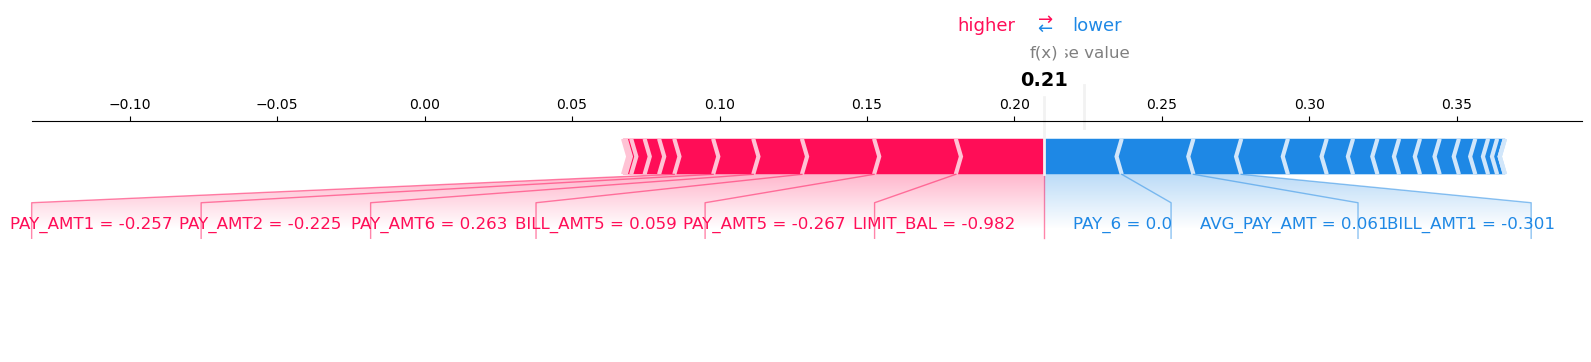

In [ ]:
shap.force_plot(
    rf_explainer.expected_value[1],
    test_rf_shap_values[1][ex_not_default_index, :],
    X_test_selected.iloc[ex_not_default_index, :],
    matplotlib=True,
)

Explaining this individual prediction with SHAP force plot:

Scaled PAY_ATM1 = -0.257, scaled PAY_ATM2 = -0.225, scaled PAY_ATM6 = 0.263, scaled BILL_ATM5 = 0.059, scaled PAY_ATM5 = -0.267, and scaled LIMIT_BAL = -0.982 are pushing the prediction towards higher score. Scaled PAY_6 = 0.0, scaled AVG_PAY_ATM = 0.061, and scaled BILL_ATM1 = -0.301 are pushing the prediction towards lower score.

In [ ]:
pd.DataFrame(
    test_rf_shap_values[1][ex_not_default_index, :],
    index=feature_names,
    columns=["SHAP values"],
).sort_values('SHAP values', ascending=False)

,SHAP values
LIMIT_BAL,0.029880
PAY_AMT5,0.027714
BILL_AMT5,0.024473
PAY_AMT6,0.016493
PAY_AMT2,0.013605
PAY_AMT1,0.013171
PAY_AMT4,0.005165
BILL_AMT6,0.004901
BILL_AMT3,0.004553
PAY_0,0.001842


<!-- END QUESTION -->

<br><br>

## 13. Summary of results

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



pipe_rf.fit(X_train, y_train)
y_pred = pipe_rf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


summary_table = pd.DataFrame({
    'Metric used for analysis': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy, precision, recall, f1]
})

summary_table


,Metric used for analysis,Score
0,Accuracy,0.813111
1,Precision,0.612903
2,Recall,0.370637
3,F1 Score,0.461932


Concluding remarks:

We have tried different machine learning models (both linear and non-linear) to figure out which one is the best for this particular problem. We have also performed hyperparameter optimization on our different models to see if the model we initially thought works well is the same one after doing hyperparameter optimization. We learned that doing hyperparamter optimization is an important step for improving model accuracy. The best model we were able to generate was the RandomForestClassifier which gave us a validation score of 0.8198095238095238. We used that model on our test set and got a score of 0.8203333333333334. The scores of both validation and test are quite similar indicating that our model is predicting well on unseen data as well. Based on these metrics, the model demonstrates reasonably good accuracy, but it shows lower performance in terms of precision, recall, and F1 score. The lower recall indicates that the model may have difficulty capturing a portion of the positive instances in the dataset. This could be an area of improvement for future iterations of the model.  

Discuss other ideas that you did not try but could potentially improve the performance/interpretability:

Something that we can do in the future is to understand what the unknowns/missing values mean in our dataset and extract the dataset from the source without missing information or a better understanding of the cause of the missing values. We could also understand if the unknown values we considered to be missing are similar or different. For this problem we assumed that missing values, 0s and -2 in PAY_# for 6 months, 0s in MARRIAGE, and 0s, 5s, and 6s in EDUCATION represent missing values since they do not hold any representation of data as per the dataset description in Kaggle. So we used the most frequent value in the column to replace these values. However, it may be possible that they impact the target in very different ways. So, we believe that studying these relationships between the missing data and target will potentially help improve the performance/interpretability.

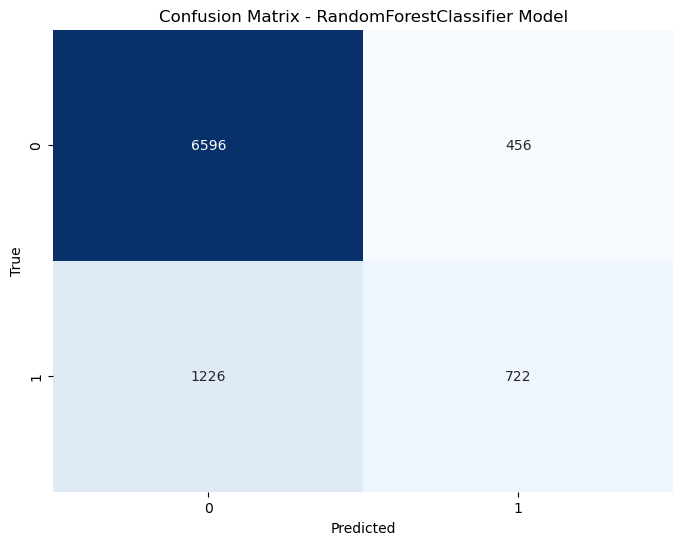

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

pipe_rf.fit(X_train, y_train)
y_pred = pipe_rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - RandomForestClassifier Model")
plt.show()

Our final test score is this 0.8203333333333334 and the metric we used is accuracy. The accuracy is 0.813111.

The precision score is 0.612903, which identifies that out of all instances predicted as positive, nearly 61.29% of them were truly positive.

The recall score is 0.370637, indicating that the model correctly predicted approximately 37.06% of the actual positive instances.

The F1 score (harmonic mean of precision and recall) is 0.461932. It provides a balanced measure of the model's performance, considering both precision and recall.

<br><br>

## 14. My Learning

Biggest takeaway from the supervised machine learning material after doing this project:


Our biggest takeaway from the supervised machine learning material we have learned so far is the importance of having a through understanding of the dataset provided to us so that we are able to take steps like preprocessing to ensure the manipulation of our data such that the model's ability to generalize increases. Moreover, we understood how necessary feature engineering is when we are working with large datasets. Feature engineering not only lets us extract meaningful information from the data but also enhances the model's performance.

Learning about supervised machine learning material helped us understand that even though a model may work well on predicting targets there are techniques to improve it or even completely different models that treat the data in a different way and still perform well. Trying to find the best approach for this problem was really interesting for us and helped us learn the material we talked about in a deeper way.